In [5]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [6]:
import pandas as pd
import numpy as nt

#scaling 클래스
from sklearn.preprocessing import scale,minmax_scale, robust_scale

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

#matplotlib 이용한 그래프 실행 및 결과 확인
%matplotlib inline

In [117]:
matplotlib.rc('font', family="Malgun Gothic")
plt.rc('font', family = 'Malgun Gothic')


In [8]:
plt.rcParams['axes.unicode_minus'] = False

In [14]:
df = pd.read_csv ('FITNESS_결측.csv', engine='python', encoding='euc-KR')
df.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [17]:
#결측치 확인

df.isnull().head() #결측치 테이블 형태에서 true값
df.isnull().sum() #결측치 합 구하기

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [18]:
#결측치 확인 다른 방법

df.info() #전체 데이터 개수에서 30개나 29개만 non-null 이므로 나머지는 null값임을 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [19]:
#null값 대체하기

df['GENDER'].fillna('여성', inplace=True) #gender에 있는 null값은 '여성' 으로 대체됨(inplace = 결측치 입력 후 저장)
df.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [25]:
#숫자형 결측치 처리: groupby(범주형 변수).agg('집계함수' like median, std, min, max and so on)
#gender로 groupby 묶고 wieght을 평균값에 대해서 계산

df.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.432667
여성    72.908750
Name: WEIGHT, dtype: float64

In [29]:
#코드가 길어서 행바꿈을 원할 시, \(won표시)로 즐 바꿈
#숫자형 결측치 처리: weight의 null값에 앞에서 구한, df.groupby('GENDER')['WEIGHT'].agg('mean')을 집어 넣어, 대체함
#agg 말고 transform의 함수로도 집계함수 값으로 대체시키기 가능
#round(2)로 소수점 두자리까지 구함

df['WEIGHT']=\
df['WEIGHT'].fillna(df.groupby('GENDER')['WEIGHT'].transform('mean')).round(2)
df

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.43,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


<AxesSubplot:>

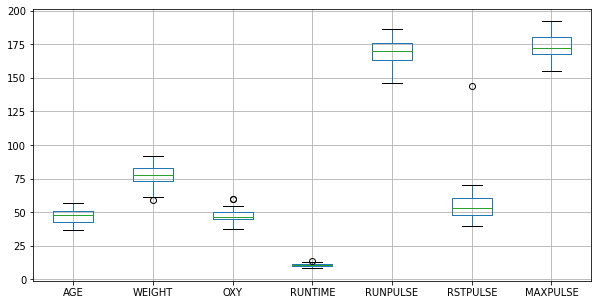

In [37]:
#중간에 자료 시각화로 확인하기(numerical 자료 확인), 사이즈 지정 가능 (안하면 그냥 ()으로 놔둬도 됨)

df.boxplot(figsize=(10, 5)) #rstpulse에서 심한 이상치 확인

In [39]:
#조건 해당 자료 직접 확인하기 (rstpulse 자료가 100을 넘어갈 수 없기 때문에)

df[df['RSTPULSE']>=100]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [40]:
#이상치 제거

df_new = df[df['RSTPULSE']<100] #이상치 28번 제외 확인 가능
df_new.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
25,George,남성,37,30대,77.45,44.811,11.63,176,58,176
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [41]:
#자료 reindex하는 것, (drop=True : 인덱스 열을 버림. inplace = true, 실제로 바꿈)

df_new.reset_index(drop=True, inplace=True)
df_new.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
25,George,남성,37,30대,77.45,44.811,11.63,176,58,176
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
29,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [43]:
#숫자형 변수만 선택 (문자형 변수만 선택하고 싶다면, include= 'object'로 함수 변환)

df_new_num = df_new.select_dtypes(exclude = 'object')
df_new_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.15,59.571,8.17,166,40,172
1,38,81.87,60.055,8.63,170,48,186
2,43,85.84,54.297,8.65,156,45,168
3,50,70.87,54.625,8.92,146,48,155
4,49,82.43,49.156,8.95,180,44,185


In [44]:
#scale변환 : 평균, 표준편차 기준

df_new_scale = scale(df_new_num)
df_new_scale[:5].round(3)

array([[-0.806, -1.119,  2.335, -1.772, -0.361, -1.857, -0.2  ],
       [-1.507,  0.607,  2.429, -1.423,  0.029, -0.778,  1.329],
       [-0.631,  1.106,  1.302, -1.408, -1.337, -1.182, -0.637],
       [ 0.596, -0.777,  1.366, -1.204, -2.313, -0.778, -2.056],
       [ 0.421,  0.677,  0.295, -1.181,  1.005, -1.317,  1.219]])

In [46]:
#데이터프레임에 scale값 대입, df_new_num의 컬럼을 다시 불러옴.

df_new_scale = pd.DataFrame(df_new_scale, columns = df_new_num.columns)
df_new_scale.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.806,-1.119,2.335,-1.772,-0.361,-1.857,-0.200
1,-1.507,0.607,2.429,-1.423,0.029,-0.778,1.329
2,-0.631,1.106,1.302,-1.408,-1.337,-1.182,-0.637
3,0.596,-0.777,1.366,-1.204,-2.313,-0.778,-2.056
4,0.421,0.677,0.295,-1.181,1.005,-1.317,1.219


In [47]:
#평균이 0이고 표준편차가 1인 결과 확인 

df_new_scale.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.677,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [48]:
#scale변환하는 다른 방법 : 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_new_num)

#scale변환하는 것을 DataFrame에 집어 넣음
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_new_num.columns)
df_scale_minmax.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.279,0.979,0.000,0.50,0.000,0.459
1,0.05,0.700,1.000,0.078,0.60,0.267,0.838
2,0.30,0.822,0.746,0.082,0.25,0.167,0.351
3,0.65,0.362,0.760,0.128,0.00,0.267,0.000
4,0.60,0.717,0.519,0.133,0.85,0.133,0.811


In [49]:
#scale 변환하는 다른 방법 : 로버스트 기준
df_scale_robust = robust_scale(df_new_num)

#scale 변환한 것을 DataFrame에 집어 넣음
df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_new_num.columns)
df_scale_robust.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.688,-0.938,2.464,-1.535,-0.296,-1.163,0.000
1,-1.188,0.535,2.559,-1.219,0.000,-0.419,1.167
2,-0.562,0.961,1.428,-1.205,-1.037,-0.698,-0.333
3,0.312,-0.646,1.493,-1.019,-1.778,-0.419,-1.417
4,0.188,0.595,0.419,-0.998,0.741,-0.791,1.083


In [51]:
df_scale_robust.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.583,2.559,2.499,1.185,1.628,1.667


In [55]:
#scale 변환 데이터 확인

df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] = df_new_num['RSTPULSE']
df_rstpulse['Standard'] = df_new_scale['RSTPULSE']
df_rstpulse['Minmax'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)


,Raw,Standard,Minmax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


array([[<AxesSubplot:title={'center':'Raw'}>,
        <AxesSubplot:title={'center':'Standard'}>],
       [<AxesSubplot:title={'center':'Minmax'}>,
        <AxesSubplot:title={'center':'Robust'}>]], dtype=object)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


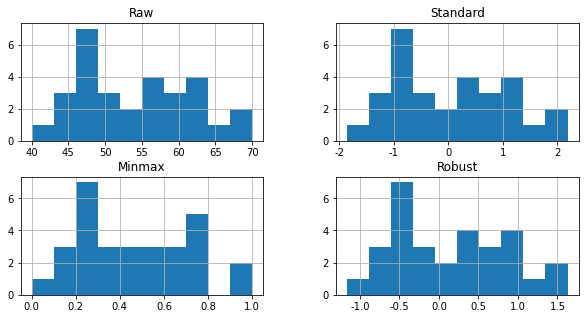

In [56]:
#막대 수에 따라서 히스토그램 모양이 달라보임

df_rstpulse[['Raw','Standard','Minmax','Robust']].hist(figsize=(10,5))

# 두번째 예제

In [57]:
#데이터 불러오기

df1 = pd.read_csv ('FITNESS.csv', engine='python', encoding='euc-KR')
df1.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [58]:
#데이터 타입 체크하기 (명목형 변수는 object 또는 sub, int 또는 float는 숫자형)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    31 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    31 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [60]:
#결측치 확인하기

df1.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

<AxesSubplot:>

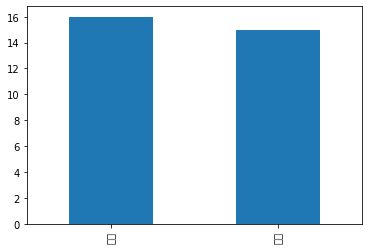

In [62]:
#barchart 만들기, 명목형 변수를 가지고 만들어야 한다.
#df1에서 gender 열을 가지고, 값을 카운트한 것을 저장하여, 막대 그래프 화

df1_count = df1['GENDER'].value_counts()
df1_count.plot.bar()

<AxesSubplot:xlabel='GENDER', ylabel='count'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

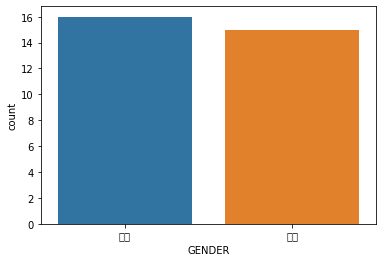

In [65]:
#sns의 countplot은 색까지 구분되어 나온다.

sns.countplot(x='GENDER', data=df1)

<AxesSubplot:>

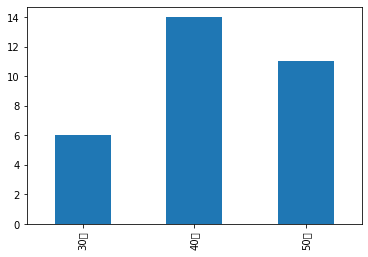

In [68]:
#agegroup의 열을 선택하여 값들을 카운트하고, 그 값을 index별로 정렬, 원본 수정 하여, count plot bar 출력

df1_count = df1['AGEGROUP'].value_counts()

df1_count.sort_index(inplace=True)
df1_count.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


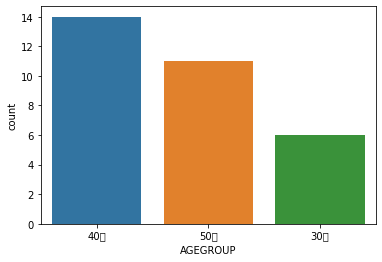

In [69]:
#sns의 countplot은 색까지 구분되어 나온다.

sns.countplot(x='AGEGROUP', data=df1, order=df1['AGEGROUP'].value_counts().index)

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

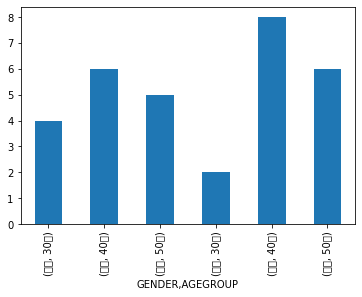

In [72]:
#성별과 연령대를 같이 넣어서 count plot하려 한다, group by하고, as_index :groupby의 인덱스로 사용 여부

df1_groupby_total = df1.groupby(['GENDER','AGEGROUP'],as_index=True).size()
df1_groupby_total.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

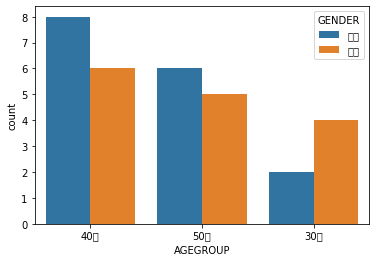

In [73]:
#sns의 countplot은 색까지 구분되어 나온다.

sns.countplot(x='AGEGROUP', hue='GENDER', data=df1, order= df1['AGEGROUP'].value_counts().index)

# 히스토그램 예제

In [74]:
#데이터 불러오기

df2 = pd.read_csv ('FITNESS.csv', engine='python', encoding='euc-KR')
df2.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

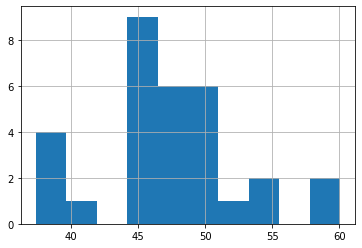

In [75]:
#히스토그램 그리기 함수는 hist(), df2의 OXY 열로 선택하여 HISTOGRAM

df2['OXY'].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

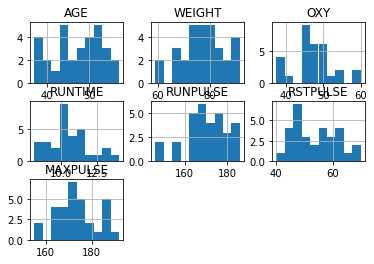

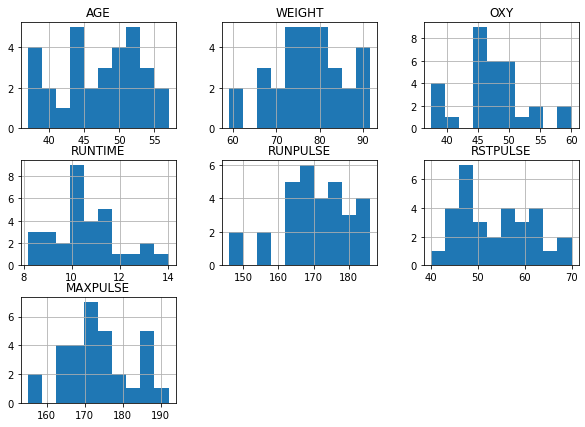

In [77]:
#df2에 있는 뉴메릭(숫자형, 연속형) 데이터들에 대해 전부 히스토그램화 하여 프린트

df2.hist()

df2.hist(figsize=(10,7)) #사이즈 다시 크게 맞추기 가능


array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

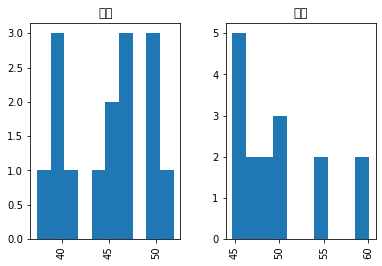

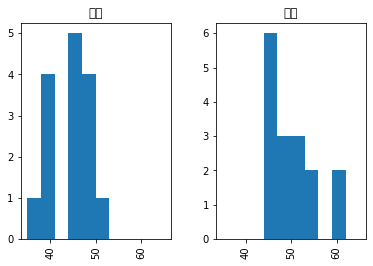

In [80]:
#성별 혈당 산소요구량 (OXY), hist(column = '변수', by = '그룹변수') = 그룹변수로 묶어서 변수 

df2.hist(column = 'OXY', by='GENDER')

df2.hist(column = 'OXY', by='GENDER', range=(35,65)) #축을 정하여 값 확인


Text(0.5, 1.0, '여성VS남성 혈당 산소요구량')

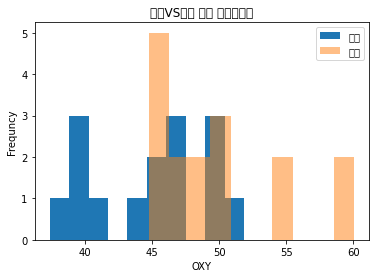

In [84]:
#GENDER가 남성인 자료들 중, OXY 열에 대해, 히스토그램을 그리는데, 투명도는 alpha, 남성으로 labelling

plt.hist(df2[df2['GENDER']=='남성']['OXY'], label="남성", alpha = 1)
plt.hist(df2[df2['GENDER']=='여성']['OXY'], label="여성", alpha = 0.5)
plt.legend() #오른쪽 위에 라베링 표시를 legend라 한다.
plt.xlabel('OXY') #x라벨링 이름
plt.ylabel('Frequncy') #y라벨링 이름
plt.title('여성VS남성 혈당 산소요구량') #title 라벨링

#남성과 여성의 혈당 산소 요구량은 서로 차이가 있구나

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

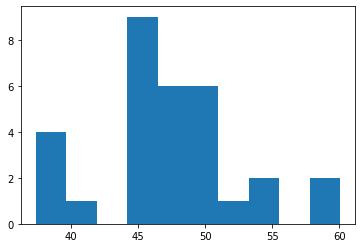

In [85]:
#그냥 임의로 OXY에 대해 histogram 그리기

plt.hist(x='OXY', data=df2)

(array([ 5.,  3., 12.,  7.,  2.,  2.]),
 array([37.388     , 41.16583333, 44.94366667, 48.7215    , 52.49933333,
        56.27716667, 60.055     ]),
 <BarContainer object of 6 artists>)

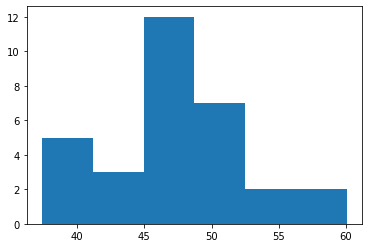

In [86]:
#데이터에 걸맞은 bins를 설정하니, 이빠진 모습이 아니라 제대로 된 그래프가 나옴.

plt.hist(x='OXY', data=df2, bins=6)

# box plot

In [87]:
#데이터 불러오기

df3 = pd.read_csv ('FITNESS.csv', engine='python', encoding='euc-KR')
df3.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

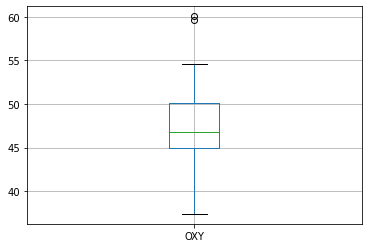

In [90]:
df3.boxplot(column='OXY')

<AxesSubplot:title={'center':'OXY'}, xlabel='GENDER'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

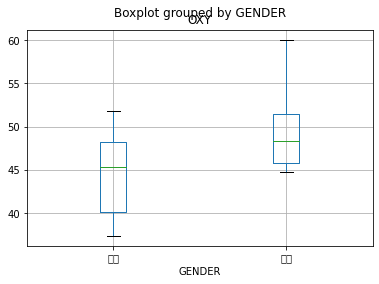

In [92]:
#남성과 여성의 box plot으로 둘로 나누어 나타냄

df3.boxplot(column='OXY', by= 'GENDER')

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

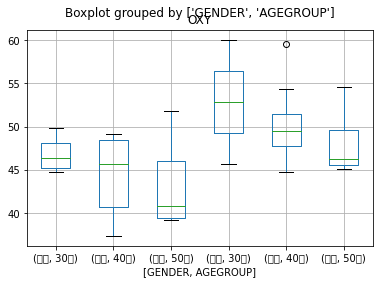

In [94]:
#성별 + 연령대 (2*3 =6)의 개수만큼 상자그림 만들어짐

df3.boxplot(column='OXY', by = ['GENDER','AGEGROUP'])

# 파이차트

In [95]:
df3 = df3.groupby(['GENDER']).size()
df3

GENDER
남성    15
여성    16
dtype: int64

<AxesSubplot:ylabel='None'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

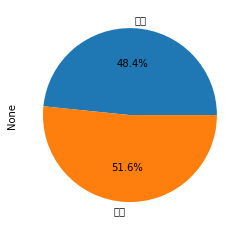

In [97]:
df3.plot.pie(y='OXY', autopct='%.1f%%')

In [98]:
###잘안됨

df3 = df3.groupby(['GENDER','AGEGROUP']).size()
df3

AGEGROUP    1
GENDER      1
dtype: int64

In [100]:
sns.scatterplot(x='RUNTIME', y='OXY', hue='GENDER', style = 'GENDER',data=df3)
                

ValueError: Could not interpret value `RUNTIME` for parameter `x`

In [102]:
#데이터 불러오기

df4 = pd.read_csv ('FITNESS.csv', engine='python', encoding='euc-KR')
df4.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


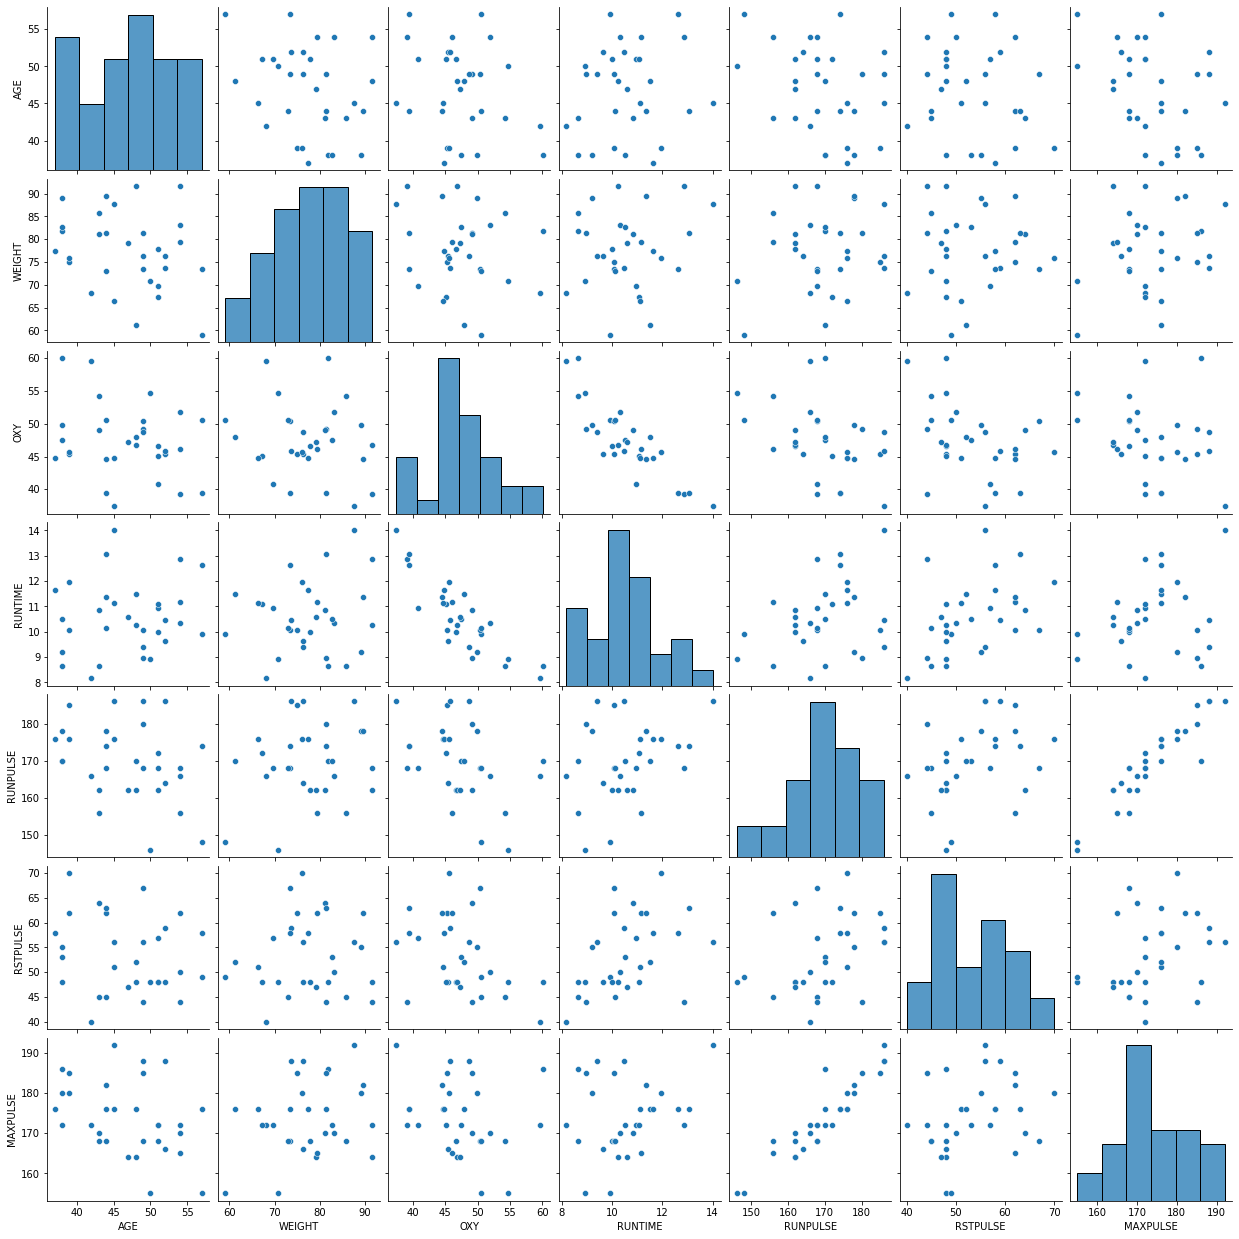

In [103]:
sns.pairplot(df4)

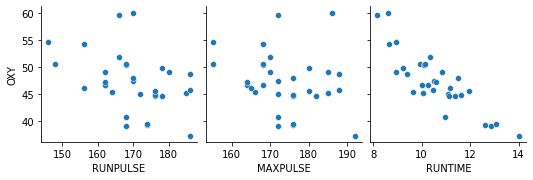

In [105]:
sns.pairplot(df4, y_vars=['OXY'], x_vars=['RUNPULSE','MAXPULSE','RUNTIME'], diag_kind=None)

# 트렌드 차트

In [108]:
#데이터 불러오기

df5 = pd.read_csv ('환율.csv', engine='python', encoding='euc-KR', parse_dates=['APPL_DATE'])
df5.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [109]:
df5_pivot=df5.pivot(index='APPL_DATE', columns='CURRENCY', values = 'STD_RATE')
df5_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

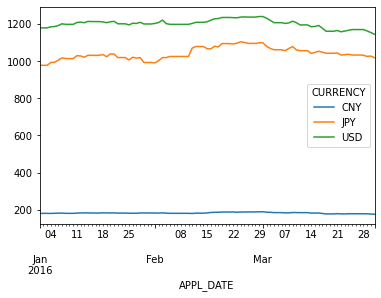

In [110]:
df5_pivot.plot()

In [111]:
#등고선

In [112]:
#데이터 불러오기

df4 = pd.read_csv ('FITNESS.csv', engine='python', encoding='euc-KR')
df4.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

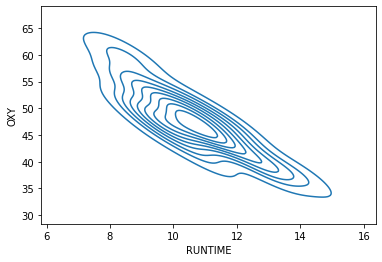

In [113]:
sns.kdeplot(df4['RUNTIME'], df4['OXY'], shade=False)

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

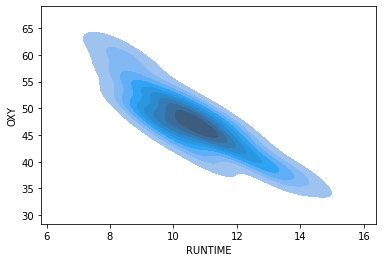

In [114]:
sns.kdeplot(df4['RUNTIME'], df4['OXY'], shade=True)

In [115]:
df = pd.read_csv ('체질검사.csv', engine='python', encoding='euc-KR')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqlot, add_constant
import statsmodels.formula.api as 늘


ImportError: cannot import name 'qqlot' from 'statsmodels.api' (/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/api.py)

In [ ]:
sns.pairplot(df, y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])